In [10]:
# Alexis Perumal, 12/10/19
# UCSD Data Bootcamp, HW5 Matplotlib
#

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_trial_df, how="right", on="Mouse ID")
# df = df.sort_values(by="Timepoint", ascending=True)

# Display the data table for preview
df = df[['Mouse ID', "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]
df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn
5,f234,25,52.178602,2,Stelasyn
6,f234,30,56.873817,2,Stelasyn
7,f234,35,57.748758,2,Stelasyn
8,x402,0,45.000000,0,Stelasyn
9,x402,5,46.327570,1,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_gb = df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_vol_series = tumor_vol_gb['Tumor Volume (mm3)'].mean()

# Preview DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol_series).reset_index()
tumor_vol_df.head(10)

# type(tumor_vol_df)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se_df = tumor_vol_gb['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_vol_se_df = pd.DataFrame(tumor_vol_se_df).reset_index()
tumor_vol_se_df.head(10)

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol2_df = tumor_vol_df.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')
tumor_vol2_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [14]:
# Tumor Response Std Error of the Mean (will be used for error bars)
tumor_vol_se2_df = tumor_vol_se_df.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')
tumor_vol_se2_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


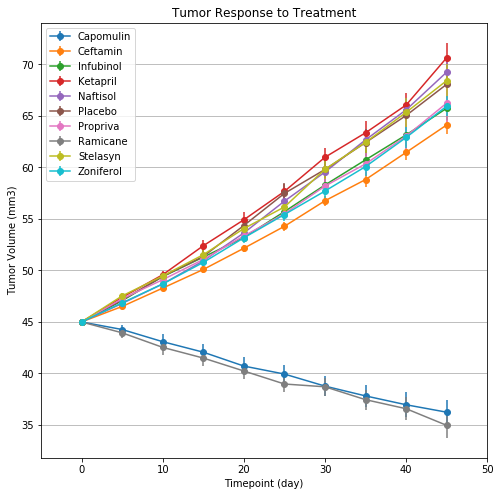

In [16]:
# Generate the Plot (with Error Bars)
for drug in tumor_vol2_df.columns:
    plt.errorbar(tumor_vol2_df.index, tumor_vol2_df[drug], yerr=tumor_vol_se2_df[drug], marker="o", label=drug)

plt.legend(loc='best')
plt.xlabel('Timepoint (day)')
plt.xlim(-5, 50)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/tumor_resp_line.png")

# Show the Figure
plt.show()






![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
met_resp_df = pd.DataFrame(tumor_vol_gb['Metastatic Sites'].mean())

# Preview DataFrame
met_resp_df.head(12)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
met_resp_se_df = pd.DataFrame(tumor_vol_gb['Metastatic Sites'].sem())

# Preview DataFrame
met_resp_se_df.head(12)
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [19]:
# Redo this with the same structure as Tumor Response. Not sure why the instructions deviated in structure.
# Store the Mean Met. Site Data Grouped by Drug and Timepoint  
met_resp_df2 = pd.DataFrame(tumor_vol_gb['Metastatic Sites'].mean()).reset_index()

# Pivot DataFrames
met_resp_df2 = met_resp_df2.pivot(index="Timepoint", columns="Drug", values='Metastatic Sites')
met_resp_df2.head(10)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [20]:
# Store the Mean Met. Site STD ERROR OF THE MEAN Data Grouped by Drug and Timepoint  
met_resp_se_df2 = pd.DataFrame(pd.DataFrame(tumor_vol_gb['Metastatic Sites'].sem())).reset_index()

# Pivot DataFrames
met_resp_se_df2 = met_resp_se_df2.pivot(index="Timepoint", columns="Drug", values='Metastatic Sites')
met_resp_se_df2.head(10)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


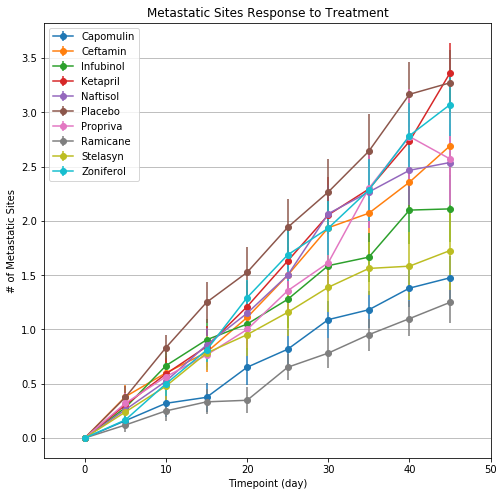

In [21]:
# Generate the Number of Metastatic Sites Plot (with Error Bars)
for drug in met_resp_df2:
    plt.errorbar(met_resp_df2.index, met_resp_df2[drug], yerr=met_resp_se_df2[drug], marker="o", label=drug)

plt.legend(loc='best')
plt.xlabel('Timepoint (day)')
plt.xlim(-5, 50)
plt.ylabel('# of Metastatic Sites')
plt.title('Metastatic Sites Response to Treatment')
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/metastatic_sites_line.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count_df = pd.DataFrame(tumor_vol_gb['Tumor Volume (mm3)'].count()).reset_index()
mice_count_df = mice_count_df.rename(columns={'Tumor Volume (mm3)':'Mouse Count','Timepoint':'Timepoint'})

# Preview DataFrame
mice_count_df.head(6)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.pivot(index="Timepoint", columns="Drug", values='Mouse Count')

# Preview the Data Frame
mice_count_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


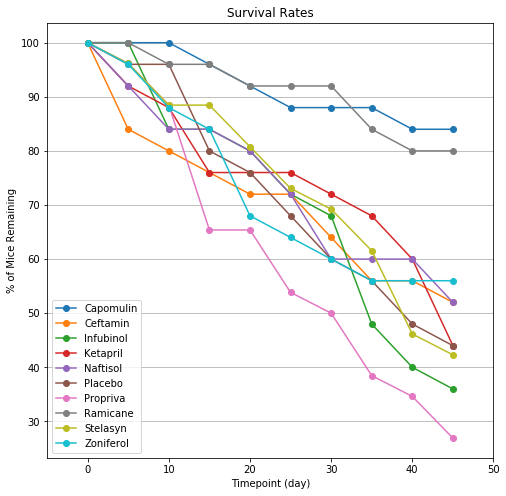

In [24]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
#plt.show()

# ---
# Generate the Number of Metastatic Sites Plot (with Error Bars)
for drug in mice_count_df:
    plt.plot(mice_count_df.index, mice_count_df[drug].map(lambda cnt: cnt/mice_count_df[drug][0]*100), marker="o", label=drug)

plt.legend(loc='best')
plt.xlabel('Timepoint (day)')
plt.xlim(-5, 50)
plt.ylabel('% of Mice Remaining')
plt.title('Survival Rates')
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/survival_line.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [26]:
# Store all Relevant Percent Changes into a Tuple
# Well, I'm storing it in a list, then a dataframe
tumor_chg = []
for drug in tumor_vol2_df.columns:
    tumor_chg.append((tumor_vol2_df[drug].iloc[-1]-tumor_vol2_df[drug].iloc[0])/tumor_vol2_df[drug].iloc[0]*100.)
    
tumor_chg_df = pd.DataFrame({'Drug':tumor_vol2_df.columns, 'Percent Change':tumor_chg})
tumor_chg_df
    
# Generate the Plot (with Error Bars)
# Splice the data between passing and failing drugs
better_df = tumor_chg_df.loc[(tumor_chg_df['Percent Change'] < 0),:]
worse_df = tumor_chg_df.loc[(tumor_chg_df['Percent Change'] >= 0),:]

# Use functions to label the percentages of changes
x = 0.0 # x coordinate of % value label
print(f"label_x_loc: {label_x_loc}")
plt.bar(better_df['Drug'], better_df['Percent Change'], color='green')
value_label = better_df['Percent Change'].map(lambda pc_chg: str(round(pc_chg,1))+"%").tolist()
for value in value_label:
    plt.text(x,-5, s=value, horizontalalignment='center', color='white', weight='bold')
    x += 1.0

plt.bar(worse_df['Drug'], worse_df['Percent Change'], color='red')
value_label = worse_df['Percent Change'].map(lambda pc_chg: str(round(pc_chg,1))+"%").tolist()
for value in value_label:
    plt.text(x,2.5, s=value, horizontalalignment='center', color='white', weight='bold')
    x += 1.0

# Orient widths. Add labels, tick marks, etc. 
plt.xlim(-1, len(tumor_chg_df))
plt.xticks(rotation=45)
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
plt.rcParams["figure.figsize"] = (10,8)
plt.grid(axis='y')


# Call functions to implement the function calls - I'm not quite sure what this inherited comment means?

# Save the Figure
plt.savefig("../Images/tumor_change_bar.png")
# Show the Figure
plt.show()


NameError: name 'label_x_loc' is not defined

![Metastatic Spread During Treatment](../Images/change.png)

Findings

1.Tumor volume: Two drugs, Ramicane (22.3% reduction) and Capomulin (19.5% reduction), demonstrated statistically significant (95% confidence) reduction in tumor volume over the 45-day day period vs. growth for the other seven drugs and placebo.

All other treatments, including the control, showed an increase in tumor volume between 42.5% and 57.0%.

The difference between Ramicane and Capomulin was not statistically significant. 

Additionally, one drug, Ceftamin, had tumor growth at a rate that was lower than the control with statistical significance. However, that impact was small compared to the results from Ramicane and Capomulin.


2.Metastatic sites: All compounds and the placebo showed an increase in metastatic sites over the trial period. Ramicane, Capomulin and Stelasyn had the lowest growth.

Metastatic site growth with Ramicane, Capomulin and Stelasyn was lower with statistical significance than the placebo.  Although the calculated growth rate for Ramicane was the lowest, the difference in growth rates among those three drugs was not statistically significant.

Infubinol and Naftisol also showed growth that was lower, with statistical significance, than the control.

None of the drugs showed growth with statistical significance higher than the control.


3.Survival Rates: None of the drugs, nor the control, resulted in full survival. Capomulin had the highest survival rate at 84% followed by Ramicane at 80%.

Those survival rates compare with all the other treatments which resulted in 68% or lower.

Since the survival rate was simply the number of mice from an original pool of 25 per treatment (26 for Propriva), and there were not multiple trials, a standard error measurement and confidence interval of the mean for hypothesis testing was not calculated. Therefore, these findings are not statistically significant without further experimentation and analysis.


Conclusion and Recommendations

1.Ramicane and Capomulin showed materially better results across tumor volume reduction and slower growth in metastatic sites with statistical significance. Additionally, they also demonstrated the highest survival rates although the statistical significance of that difference can’t be evaluated. Overall, we recommend continued aggressive evaluation of these two drugs.

2.Three other drugs also demonstrated a weaker, but still statistically significant beneficial response:
a.	Ceftamin with slower tumor volume growth
b.	Stelasyn, Infubinol, Naftisol with slower growth in metastatic sites.

These compounds may merit further evaluation in the event that Ramicane and Capomulin are disqualified based on further evaluation.

3.None of the compounds did worse than the control with statistical significance.
